In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
weather_clean = pd.read_excel('weather1.xlsx')
weather_clean.columns = ['Дата', 'T']
weather_clean['Дата'] = pd.to_datetime(weather_clean['Дата'], dayfirst=True)
weather_clean['T'] = pd.to_numeric(weather_clean['T'], errors='coerce')

In [5]:
df = pd.read_csv('data2.csv')
df['Дата'] = pd.to_datetime(df['Дата'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Дата'])

In [7]:
grouped_df = (df.groupby('Дата', as_index=False).agg(Количество_продаж=('Количество', 'sum')))

In [9]:
merged_df = pd.merge(grouped_df, weather_clean, on='Дата', how='left')

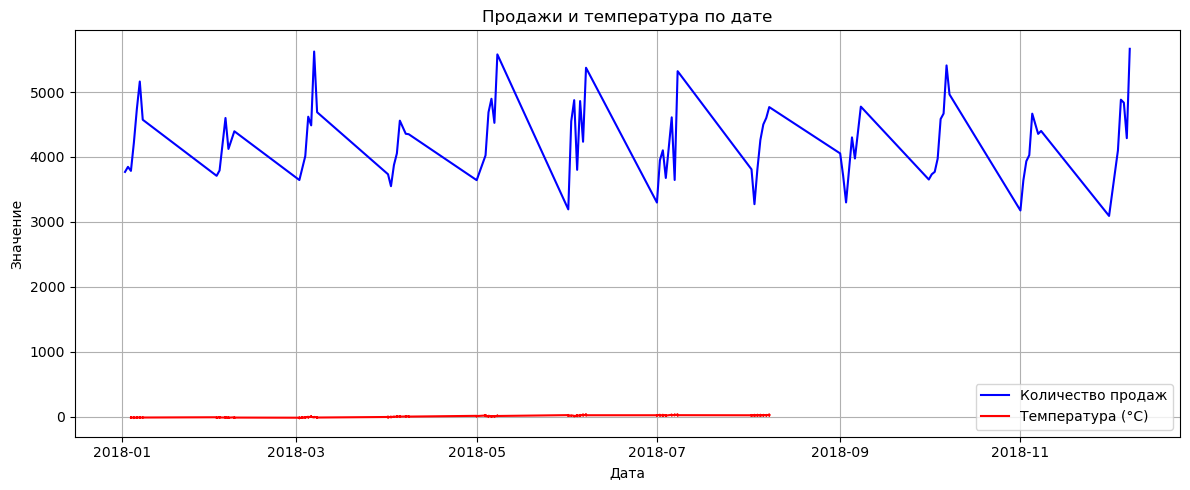

In [11]:
plt.figure(figsize=(12, 5))
plt.plot(merged_df['Дата'], merged_df['Количество_продаж'], label='Количество продаж', color='blue')
plt.plot(merged_df['Дата'], merged_df['T'], label='Температура (°C)', color='red')
plt.title('Продажи и температура по дате')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

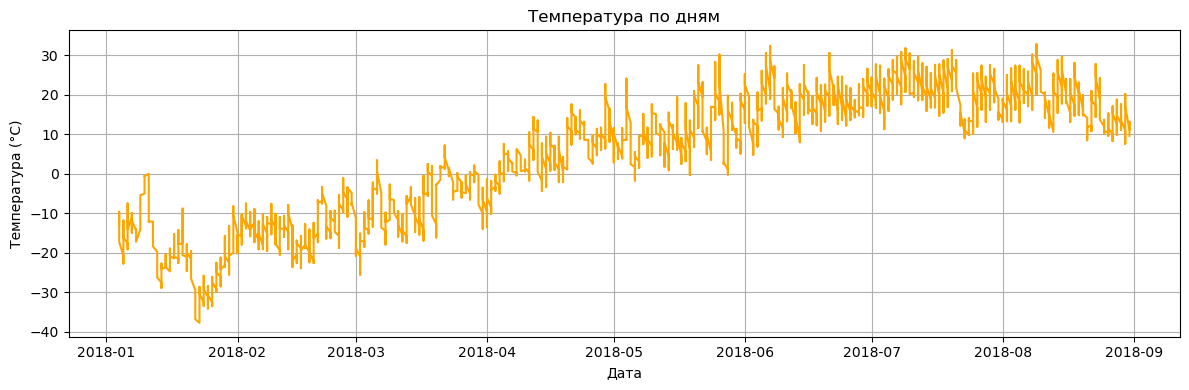

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(weather_clean['Дата'], weather_clean['T'], color='orange')
plt.title('Температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()